In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

In [37]:
house_data=pd.read_csv('C:/Users/Sangam/Mumbai Metropolitan Region.csv')

In [38]:
house_data

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,0,4850000,720,Kharghar,1.0,0,0,1,1,1.0,1,0,0,0,0,0,0,0,0
1,1,4500000,600,Kharghar,1.0,0,1,1,1,1.0,1,0,1,0,0,0,0,1,1
2,2,6700000,650,Kharghar,1.0,0,1,1,1,1.0,1,1,1,1,0,0,0,1,1
3,3,4500000,650,Kharghar,1.0,0,0,1,1,1.0,1,0,0,1,1,0,0,0,0
4,4,5000000,665,Kharghar,1.0,0,0,1,1,1.0,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,1994,2300000,254,Mira Road East,1.0,0,0,1,0,0.0,1,0,0,0,0,0,0,0,0
1995,1995,2000000,220,Mira Road East,1.0,0,0,1,0,0.0,1,0,0,0,0,0,1,0,0
1996,1996,8300000,525,Kandivali East,1.0,0,1,1,1,1.0,1,0,1,1,0,0,1,1,1
1997,1997,7400000,650,Nerul,1.0,0,0,1,1,0.0,1,0,0,0,0,0,1,0,0


In [39]:
house_data.head()


,Unnamed: 0,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,0,4850000,720,Kharghar,1.0,0,0,1,1,1.0,1,0,0,0,0,0,0,0,0
1,1,4500000,600,Kharghar,1.0,0,1,1,1,1.0,1,0,1,0,0,0,0,1,1
2,2,6700000,650,Kharghar,1.0,0,1,1,1,1.0,1,1,1,1,0,0,0,1,1
3,3,4500000,650,Kharghar,1.0,0,0,1,1,1.0,1,0,0,1,1,0,0,0,0
4,4,5000000,665,Kharghar,1.0,0,0,1,1,1.0,1,0,0,1,1,0,0,0,0


In [5]:
house_data.tail()

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
1994,1994,2300000,254,Mira Road East,1.0,0,0,1,0,0.0,1,0,0,0,0,0,0,0,0
1995,1995,2000000,220,Mira Road East,1.0,0,0,1,0,0.0,1,0,0,0,0,0,1,0,0
1996,1996,8300000,525,Kandivali East,1.0,0,1,1,1,1.0,1,0,1,1,0,0,1,1,1
1997,1997,7400000,650,Nerul,1.0,0,0,1,1,0.0,1,0,0,0,0,0,1,0,0
1998,1998,9500000,826,Kolshet Industrial Area,2.0,0,0,1,1,1.0,1,0,0,0,0,0,0,0,0


In [6]:
house_data.shape

(1999, 19)

In [7]:
house_data.columns

Index(['Unnamed: 0', 'Price', 'Area', 'Location', 'No. of Bedrooms',
       'New/Resale', 'Gymnasium', 'Lift Available', 'Car Parking',
       'Maintenance Staff', '24x7 Security', 'Children's Play Area',
       'Clubhouse', 'Intercom', 'Landscaped Gardens', 'Indoor Games',
       'Gas Connection', 'Jogging Track', 'Swimming Pool'],
      dtype='object')

In [8]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1999 non-null   int64  
 1   Price                 1999 non-null   int64  
 2   Area                  1999 non-null   int64  
 3   Location              1999 non-null   object 
 4   No. of Bedrooms       1973 non-null   float64
 5   New/Resale            1999 non-null   int64  
 6   Gymnasium             1999 non-null   int64  
 7   Lift Available        1999 non-null   int64  
 8   Car Parking           1999 non-null   int64  
 9   Maintenance Staff     1985 non-null   float64
 10  24x7 Security         1999 non-null   int64  
 11  Children's Play Area  1999 non-null   int64  
 12  Clubhouse             1999 non-null   int64  
 13  Intercom              1999 non-null   int64  
 14  Landscaped Gardens    1999 non-null   int64  
 15  Indoor Games         

In [9]:
house_data['Location'].unique()
# len(house_data.Location.unique()

array(['Kharghar', 'Sector-13 Kharghar', 'Sector 18 Kharghar',
       'Sector 20 Kharghar', 'Sector 15 Kharghar', 'Dombivali',
       'Churchgate', 'Prabhadevi', 'Jogeshwari West', 'Kalyan East',
       'Malad East', 'Virar East', 'Virar', 'Malad West', 'Borivali East',
       'Mira Road East', 'Goregaon West', 'Kandivali West',
       'Borivali West', 'Kandivali East', 'Andheri East', 'Goregaon East',
       'Wadala', 'Ulwe', 'Dahisar', 'kandivali', 'Goregaon',
       'Bhandup West', 'thakur village kandivali east', 'Santacruz West',
       'Kanjurmarg', 'I C Colony', 'Dahisar W', 'Marol', 'Parel',
       'Lower Parel', 'Worli', 'Jogeshwari East', 'Chembur Shell Colony',
       'Central Avenue', 'Chembur East', 'Diamond Market Road', 'Mulund',
       'Nalasopara West', 'raheja vihar', 'Powai Lake', 'MHADA Colony 20',
       'Tolaram Colony', 'Taloja', 'Thane West', 'Vangani',
       'Sector 5 Ulwe', 'Sector12 New Panvel', 'Sector 17 Ulwe',
       'Sector9 Kamothe', 'Sector 19 Kharghar

In [10]:
house_data['No. of Bedrooms'].value_counts()

2.0    776
1.0    678
3.0    422
4.0     75
5.0     17
6.0      3
7.0      2
Name: No. of Bedrooms, dtype: int64

In [11]:
house_data.duplicated().sum()

0

In [14]:
house_data.isnull().sum()

Unnamed: 0              0
Price                   0
Area                    0
Location                0
No. of Bedrooms         0
New/Resale              0
Gymnasium               0
Lift Available          0
Car Parking             0
Maintenance Staff       0
24x7 Security           0
Children's Play Area    0
Clubhouse               0
Intercom                0
Landscaped Gardens      0
Indoor Games            0
Gas Connection          0
Jogging Track           0
Swimming Pool           0
dtype: int64

In [15]:
house_data=house_data.fillna(method ='bfill')

In [16]:
house_data.isnull().sum()

Unnamed: 0              0
Price                   0
Area                    0
Location                0
No. of Bedrooms         0
New/Resale              0
Gymnasium               0
Lift Available          0
Car Parking             0
Maintenance Staff       0
24x7 Security           0
Children's Play Area    0
Clubhouse               0
Intercom                0
Landscaped Gardens      0
Indoor Games            0
Gas Connection          0
Jogging Track           0
Swimming Pool           0
dtype: int64

In [17]:
house_data=house_data.drop(['Unnamed: 0',"Children's Play Area",'Gas Connection','Jogging Track','Intercom','Clubhouse','Gymnasium','Indoor Games',],axis=1)

In [18]:
house_data.shape

(1999, 11)

In [19]:
house_data['Price_per_sqft'] = house_data['Price']/house_data['Area']

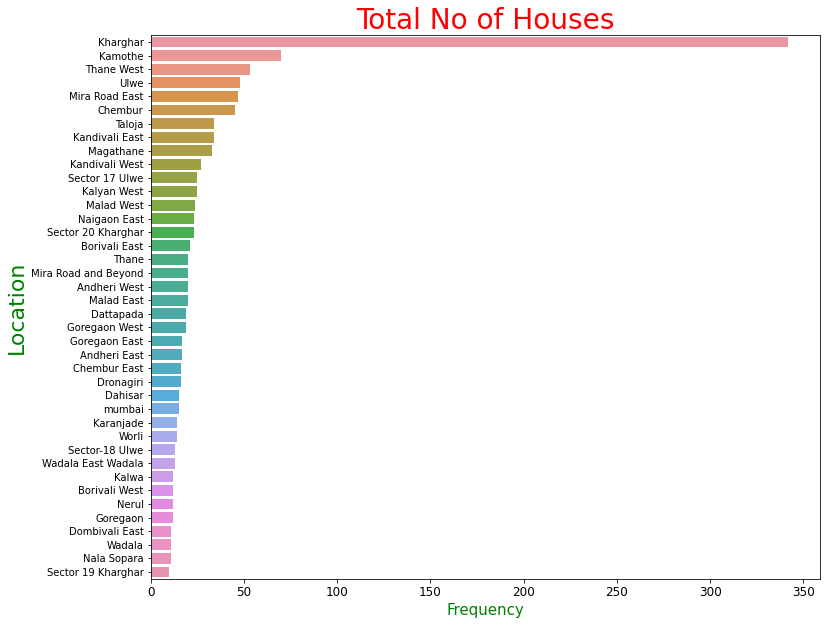

In [20]:
plt.figure(figsize=(12,10))
most_cat = house_data['Location'].value_counts()[:40]
sns.barplot(x=most_cat, y=most_cat.index, data=house_data)
plt.xticks(size=12)
plt.xlabel("Frequency",size=15,c="g")
plt.ylabel("Location",size=22,c="g")
plt.title("Total No of Houses",size=28,c="r")
plt.show()

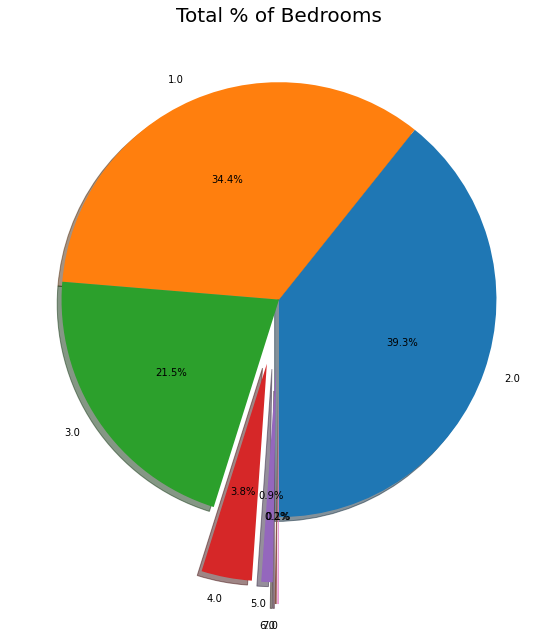

In [21]:
plt.figure(figsize=(10,10))
labels =house_data['No. of Bedrooms'].value_counts(sort = True).index
sizes = house_data['No. of Bedrooms'].value_counts(sort = True)
explode = (0.0, 0.0, 0.0, 0.3, 0.3, 0.4,0.4)
plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True, startangle=270,explode=explode)
plt.title('Total % of Bedrooms',size = 20)
plt.show()

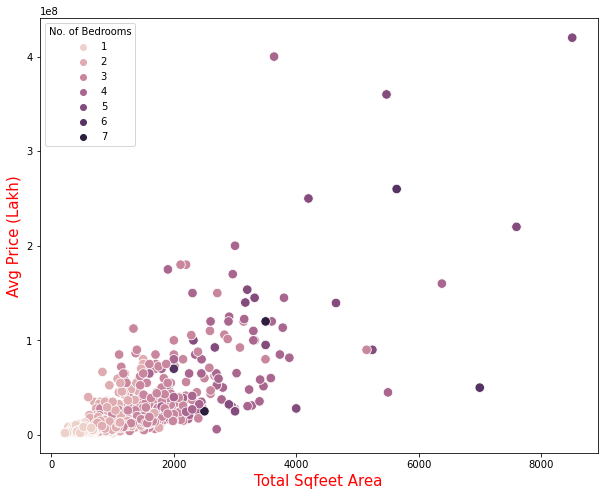

In [22]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Area',y='Price',data=house_data,hue='No. of Bedrooms',s=90)
plt.xlabel("Total Sqfeet Area",size=15,c="r")
plt.ylabel("Avg Price (Lakh)",size=15,c="r")
plt.show()

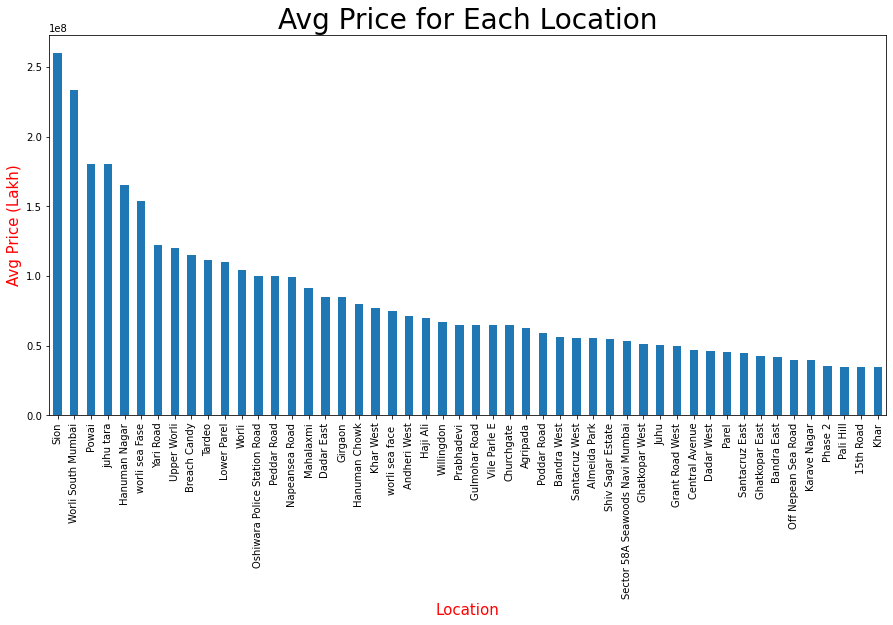

In [23]:
plt.figure(figsize=(15,7))
house_data.groupby("Location")['Price'].mean().sort_values(ascending=False)[:50].plot(kind="bar")
plt.xlabel("Location",size=15,c="r")
plt.ylabel("Avg Price (Lakh)",size=15,c="r")
plt.title("Avg Price for Each Location",size=28,c="k")
plt.show()

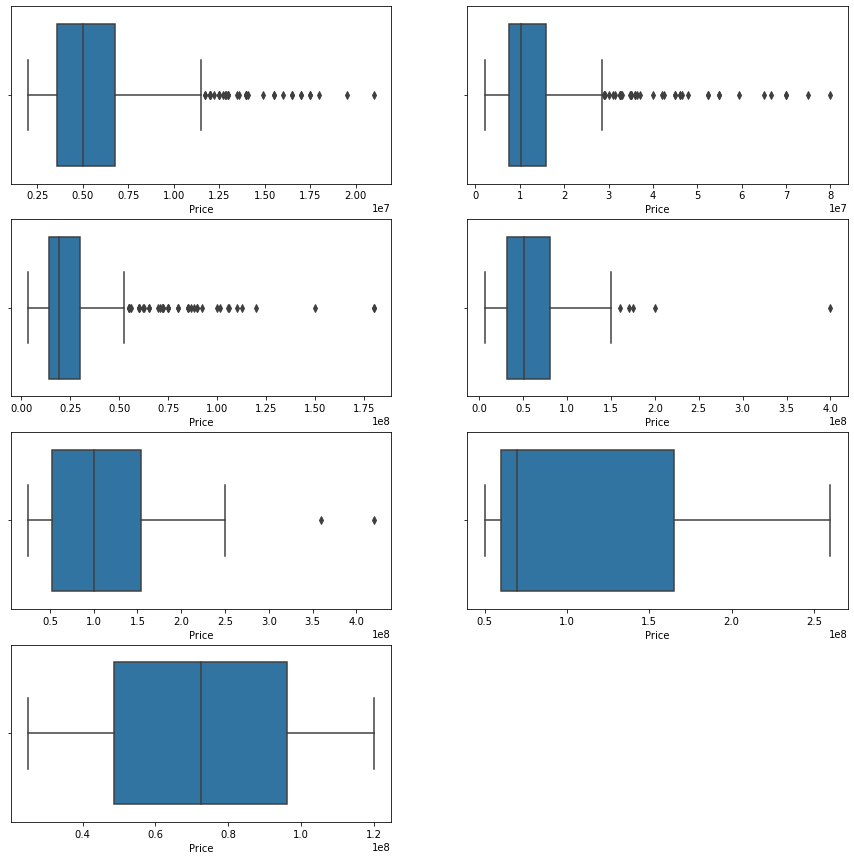

In [24]:
df_1=house_data[house_data['No. of Bedrooms']==1]
df_2=house_data[house_data['No. of Bedrooms']==2]
df_3=house_data[house_data['No. of Bedrooms']==3]
df_4=house_data[house_data['No. of Bedrooms']==4]
df_5=house_data[house_data['No. of Bedrooms']==5]
df_6=house_data[house_data['No. of Bedrooms']==6]
df_7=house_data[house_data['No. of Bedrooms']==7]
plt.figure(figsize=(15,15))
plt.subplot(4,2,1)
sns.boxplot(data=df_1,x=df_1['Price'])
plt.subplot(4,2,2)
sns.boxplot(data=df_2,x=df_2['Price'])
plt.subplot(4,2,3)
sns.boxplot(data=df_3,x=df_3['Price'])
plt.subplot(4,2,4)
sns.boxplot(data=df_4,x=df_4['Price'])
plt.subplot(4,2,5)
sns.boxplot(data=df_5,x=df_5['Price'])
plt.subplot(4,2,6)
sns.boxplot(data=df_6,x=df_6['Price'])
plt.subplot(4,2,7)
sns.boxplot(data=df_7,x=df_7['Price'])
plt.show()

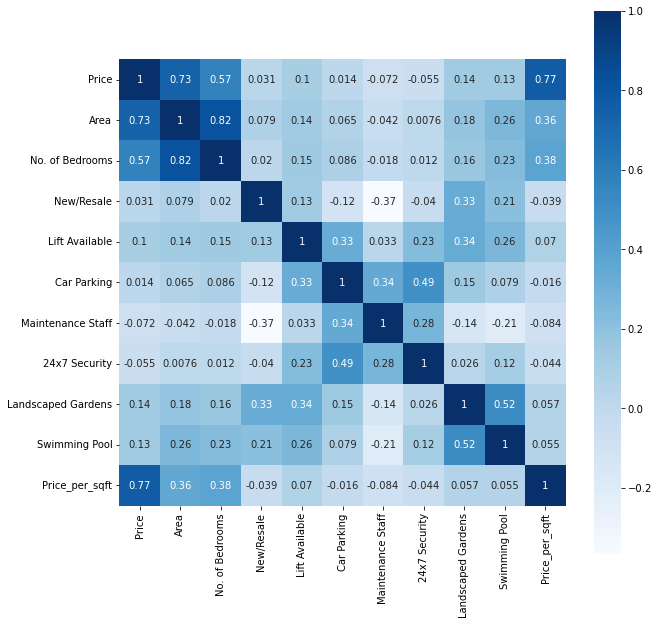

In [25]:
house_corr=house_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(house_corr,square=True,cbar=True,annot=True,cmap='Blues')
plt.show()

In [26]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
house_data['Location']= label_encoder.fit_transform(house_data['Location'])

In [27]:
def removeOutliners(df):
  df_Out = pd.DataFrame()
  for key,subdf in df.groupby('Location'):
    m = np.mean(subdf.Price_per_sqft)
    st = np.std(subdf.Price_per_sqft)
    reduced = subdf[(subdf.Price_per_sqft>(m-st)) & (subdf.Price_per_sqft<=(m+st))]
    df_Out = pd.concat([df_Out,reduced],ignore_index=True)
  return df_Out
house_data = removeOutliners(house_data)
house_data.shape


(1303, 12)

In [28]:
X=house_data.drop(columns=['Price'],axis=1)
Y=house_data['Price']

In [29]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

In [30]:
print(X.shape,X_train.shape,X_test.shape)

(1303, 11) (912, 11) (391, 11)


In [31]:
print(Y.shape,Y_train.shape,Y_test.shape)

(1303,) (912,) (391,)


In [32]:
lr_clf = LinearRegression()
lr_clf.fit(X_train,Y_train)

LR_prediction=lr_clf.predict(X_test)
print('R2 Score :',r2_score(LR_prediction,Y_test)*100)
print('MAE:',mean_absolute_error(LR_prediction,Y_test))
print('MSE:',mean_squared_error(LR_prediction,Y_test))
rmse = sqrt(mean_squared_error(LR_prediction,Y_test))
print('RMSE:',rmse)

R2 Score : 87.89227829895007
MAE: 4711806.6004475495
MSE: 45738820187394.086
RMSE: 6763048.14321132


In [33]:
DT = DecisionTreeRegressor()
DT.fit(X_train,Y_train)


DT_prediction=DT.predict(X_test)
print('R2 Score :',r2_score(DT_prediction,Y_test)*100)
print('MAE:',mean_absolute_error(DT_prediction,Y_test))
print('MSE:',mean_squared_error(DT_prediction,Y_test))
rmse = sqrt(mean_squared_error(DT_prediction,Y_test))
print('RMSE:',rmse)

R2 Score : 91.56125990980716
MAE: 1161618.9232736572
MSE: 20153280566772.395
RMSE: 4489240.533405666


In [34]:
RF=RandomForestRegressor()
RF.fit(X_train,Y_train)

RF_prediction=RF.predict(X_test)
print('R2 Score :',r2_score(RF_prediction,Y_test)*100)
print('MAE:',mean_absolute_error(RF_prediction,Y_test))
print('MSE:',mean_squared_error(RF_prediction,Y_test))
rmse = sqrt(mean_squared_error(RF_prediction,Y_test))
print('RMSE:',rmse)

RF.score(X_test,Y_test)

R2 Score : 96.56832977681695
MAE: 753149.7459590791
MSE: 9209123427622.188
RMSE: 3034653.7574527655


0.9681712785484583

In [35]:
pd.DataFrame(data={'Actual':Y_test,'Predicted':RF_prediction}).head()

,Actual,Predicted
831,4200000,4154910.0
625,14200000,13731000.0
358,7200000,7128000.0
1112,8000000,8403000.0
646,11800000,11531000.0


In [36]:
Input_data=np.array([[1245,3,2.0,1,1,1,0.0,0,0,0,11967.871486]])
Predictive_system=lr_clf.predict(Input_data)
print(Predictive_system)

[21490646.64595836]
